In [41]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

class NeutrinoElectronScattering:
    neutrinoelectron = 12
    neutrinomuon = 14
    neutrinotau = 16

    def __init__(self):
        self.sin2w = 0.23121
        self.gv = -1. / 2. + 2. * self.sin2w
        self.ga = -1. / 2.
        self.me = 0.510998950  # MeV
        self.mmu = 105.6583755  # MeV
        self.mtau = 1776.86  # MeV

        self.Pi = 3.1415927
        self.GF = 1.166378e-5  # GeV^-2
        self.GF2 = self.GF * self.GF
        self.MeV2mbarn = 1. / 2.56819e+6

        print("Neutrino-Electron scattering initialized")

    def electronmass(self):
        return self.me

    def muonmass(self):
        return self.mmu

    def taumass(self):
        return self.mtau

    def S(self, Enu):
        return (Enu + self.electronmass()) ** 2 - Enu ** 2

    def Y(self, Enu, Ee):
        return (Ee - self.electronmass()) / Enu

    def Normalization(self):
        return self.GF2 / self.Pi * self.MeV2mbarn

    def diffcrosssection(self, Enu, El, neutrino):
        aneut = False

        if neutrino < 0:
            aneut = True

        xs = 0

        if El >= self.electronmass():
            if abs(neutrino) == self.neutrinoelectron:
                xs = self.nuee(Enu, El, aneut)
            else:
                xs = self.nule(Enu, El, aneut)

        if xs < 0:
            xs = 0

        return xs

    def GENcrosssection(self, Enu, El, cos, neutrino):
        aneut = False

        if neutrino < 0:
            aneut = True

        xs = 0

        if El >= self.electronmass():
            if abs(neutrino) == self.neutrinoelectron:
                xs = self.GENnuee(Enu, El, cos, aneut)
            else:
                xs = self.GENnule(Enu, El, cos, aneut)

        if xs < 0:
            xs = 0

        return xs

    def Totalcrosssection(self, Enu, neutrino):
        aneut = False

        if neutrino < 0:
            aneut = True

        xs = 0

        if abs(neutrino) == self.neutrinoelectron:
            xs = self.nueeInt(Enu, aneut)
        else:
            xs = self.nuleInt(Enu, aneut)

        if xs < 0:
            xs = 0

        return xs

    def GetCosine(self, Enu, El, neutrino):
        mass = self.me

        Pl = math.sqrt(El ** 2 - mass ** 2)

        return (El * mass + Enu * El - mass ** 2 - Enu * mass) / (Enu * Pl)

    def GetEnu(self, Cosine, El, neutrino):
        mass = self.me

        Pl = math.sqrt(El ** 2 - mass ** 2)

        return (El * mass - mass ** 2) / (-El + mass + Pl * Cosine)

    def GenerateY(self, CLL, CLR, N):
        r = random.random()

        A = CLL ** 2 / N
        B = CLR ** 2 / N
        C = r

        a2 = 3. * A / B
        a3 = 3. * (C - B / 3. - A) / B

        Q = a2 / 3.
        R = -a3 / 2.

        discriminant = Q ** 3 + R ** 2

        S1 = (R + math.sqrt(discriminant)) ** (1. / 3.)
        S2 = -(math.sqrt(discriminant) - R) ** (1. / 3.)

        x1 = S1 + S2

        return 1 - x1

    def nule(self, Enu, Ee, aneut=False):
        y = self.Y(Enu, Ee)

        if not aneut:
            CLL = -1. / 2. + self.sin2w
            CLR = self.sin2w
        else:
            CLL = self.sin2w
            CLR = -1. / 2. + self.sin2w

        return self.Normalization() * self.S(Enu) * (CLL ** 2 + CLR ** 2 * (1 - y) ** 2)

    def nuleInt(self, Enu, aneut=False):
        norm = self.GF2 / self.Pi * self.MeV2mbarn
        s = self.S(Enu)

        CLL = -1. / 2. + self.sin2w
        CLR = self.sin2w

        if Enu == 0:
            ymax = 0
        else:
            ymax = (Enu - self.me) / Enu

        return norm * s * (CLL ** 2 * ymax + CLR ** 2 * 1. / 3. * (-(1 - ymax) ** 3 + 1))

    def GENnule(self, Enu, El, cos, aneut=False):
        norm = self.GF2 / self.Pi * self.MeV2mbarn
        s = self.S(Enu)

        CLL = -1. / 2. + self.sin2w
        CLR = self.sin2w

        if aneut:
            CLL = self.sin2w
            CLR = -1. / 2. + self.sin2w

        ymax = (Enu - self.me) / Enu

        N = self.nuleInt(Enu, aneut) / (norm * s)

        y1 = self.GenerateY(CLL, CLR, N)

        El = y1 * Enu + self.me

        cos = self.GetCosine(Enu, El, self.neutrinoelectron)

        return self.nule(Enu, El, aneut)

    def nueeInt(self, Enu, aneut=False):
        norm = self.GF2 / self.Pi * self.MeV2mbarn
        s = self.S(Enu)

        CLL = 1. / 2. + self.sin2w
        CLR = self.sin2w

        if Enu == 0:
            ymax = 0
        else:
            ymax = (Enu - self.me) / Enu

        return norm * s * (CLL ** 2 * ymax + CLR ** 2 * 1. / 3. * (-(1 - ymax) ** 3 + 1))

    def nuee(self, Enu, Ee, aneut=False):
        y = self.Y(Enu, Ee)

        if not aneut:
            CLL = 1. / 2. + self.sin2w
            CLR = self.sin2w
        else:
            CLL = -1. / 2. + self.sin2w
            CLR = 1. / 2. + self.sin2w

        return self.Normalization() * self.S(Enu) * (CLL ** 2 + CLR ** 2 * (1 - y) ** 2)

    def GENnuee(self, Enu, El, cos, aneut=False):
        CLL = 1. / 2. + self.sin2w
        CLR = self.sin2w

        ymax = (Enu - self.me) / Enu

        N = self.nueeInt(Enu, aneut) / self.Normalization() / self.S(Enu)

        y1 = self.GenerateY(CLL, CLR, N)

        El = y1 * Enu + self.me

        cos = self.GetCosine(Enu, El, self.neutrinoelectron)

        return self.nuee(Enu, El, aneut)


class NeutrinoElectronScattering:

    nul = NeutrinoElectronScattering()

    neutrinotype = nul.neutrinoelectron

    EnuIn = 10.0
    Emin = 0.0

    r = random.Random()
    if EnuIn < 0:
        Enu = r.uniform(Emin, -EnuIn)
    else:
        Enu = EnuIn

    cos = nul.GetCosine(Enu, Enu, neutrinotype)

    El = nul.GetEnu(cos, Enu, neutrinotype)

    xs = nul.GENcrosssection(Enu, El, cos, neutrinotype)

    print(f"Enu: {Enu}, El: {El}, cos: {cos}, Cross-section: {xs}")



Neutrino-Electron scattering initialized
Enu: 10.0, El: 10.000000000000004, cos: 0.998693546955716, Cross-section: 9.51890651850397e-17


In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random


class NeutrinoElectronScattering:
  neutrinoelectron = 12
  neutrinomuon = 14
  neutrinotau = 16

  num_events = 0.
  r = random.Random()

  def __init__(self):
    self.sin2w = 0.23121
    self.gv = -1. / 2. + 2. * self.sin2w
    self.ga = -1. / 2.
    self.me = 0.510998950  # MeV
    self.mmu = 105.6583755  # MeV
    self.mtau = 1776.86  # MeV
    self.Pi = 3.1415927
    self.GF = 1.166378e-5  # GeV^-2
    self.GF2 = self.GF * self.GF
    self.MeV2mbarn = 1. / 2.56819e+6
    print("Neutrino-Electron scattering initialized")

  def electronmass(self):
    return self.me

  def muonmass(self):
    return self.mmu

  def taumass(self):
    return self.mtau

  def S(self, Enu):
    return (Enu + self.electronmass()) ** 2 - Enu ** 2

  def Y(self, Enu, Ee):
    return (Ee - self.electronmass()) / Enu

  def Normalization(self):
    return self.GF2 / self.Pi * self.MeV2mbarn

  def diffcrosssection(self, Enu, El, neutrino):
    aneut = False
    if neutrino < 0:
      aneut = True
    xs = 0
    if El >= self.electronmass():
      if abs(neutrino) == self.neutrinoelectron:
        xs = self.nuee(Enu, El, aneut)
      else:
        xs = self.nule(Enu, El, aneut)
    if xs < 0:
      xs = 0
    return xs

  def GENcrosssection(self, Enu, El, cos, neutrino):
    aneut = False
    if neutrino < 0:
      aneut = True
    xs = 0
    if El >= self.electronmass():
      if abs(neutrino) == self.neutrinoelectron:
        xs = self.GENnuee(Enu, El, cos, aneut)
      else:
        xs = self.GENnule(Enu, El, cos, aneut)
    if xs < 0:
      xs = 0
    return xs

  def Totalcrosssection(self, Enu, neutrino):
    aneut = False
    if neutrino < 0:
      aneut = True
    xs = 0
    if abs(neutrino) == self.neutrinoelectron:
      xs = self.nueeInt(Enu, aneut)
    else:
      xs = self.nuleInt(Enu, aneut)
    if xs < 0:
      xs = 0
    return xs

  def GetCosine(self, Enu, El, neutrino):
    mass = self.me
    Pl = math.sqrt(El ** 2 - mass ** 2)
    return (El * mass + Enu * El - mass ** 2 - Enu * mass) / (Enu * Pl)

  def GetEnu(self, Cosine, El, neutrino):
    mass = self.me
    Pl = math.sqrt(El ** 2 - mass ** 2)
    return (El * mass - mass ** 2) / (-El + mass + Pl * Cosine)

  def GenerateY(self, CLL, CLR, N):
    r = random.random()
    A = CLL ** 2 / N
    B = CLR ** 2 / N
    C = r
    a2 = 3. * A / B
    a3 = 3. * (C - B / 3. - A) / B
    Q = a2 / 3.
    R = -a3 / 2.
    discriminant = Q ** 3 + R ** 2
    S1 = (R + math.sqrt(discriminant)) ** (1. / 3.)
    S2 = -(math.sqrt(discriminant) - R) ** (1. / 3.)
    x1 = S1 + S2
    return 1 - x1

  def nule(self, Enu, Ee, aneut=False):
    y = self.Y(Enu, Ee)
    if not aneut:
      CLL = -1. / 2. + self.sin2w
      CLR = self.sin2w
    else:
      CLL = self.sin2w
      CLR = -1. / 2. + self.sin2w
    return self.Normalization() * self.S(Enu) * (CLL ** 2 + CLR ** 2 * (1 - y) ** 2)

  def nuleInt(self, Enu, aneut=False):
    norm = self.GF2 / self.Pi * self.MeV2mbarn
    s = self.S(Enu)
    CLL = -1. / 2. + self.sin2w
    CLR = self.sin2w
    if Enu == 0:
      ymax = 0
    else:
      ymax = (Enu - self.me) / Enu
    return norm * s * (CLL ** 2 * ymax + CLR ** 2 * 1. / 3. * (-(1 - ymax) ** 3 + 1))

  def GENnule(self, Enu, El, cos, aneut=False):
    norm = self.GF2 / self.Pi * self.MeV2mbarn
    s = self.S(Enu)
    CLL = -1. / 2. + self.sin2w
    CLR = self.sin2w
    if aneut:
      CLL = self.sin2w
      CLR = -1. / 2. + self.sin2w
    ymax = (Enu - self.me) / Enu
    N = self.nuleInt(Enu, aneut) / (norm * s)
    y1 = self.GenerateY(CLL, CLR, N)
    El = y1 * Enu + self.me
    cos = self.GetCosine(Enu, El, self.neutrinoelectron)
    return self.nule(Enu, El, aneut)

  def nueeInt(self, Enu, aneut=False):
    norm = self.GF2 / self.Pi * self.MeV2mbarn
    s = self.S(Enu)
    CLL = 1. / 2. + self.sin2w
    CLR = self.sin2w
    if Enu == 0:
      ymax = 0
    else:
      ymax = (Enu - self.me) / Enu
    return norm * s * (CLL ** 2 * ymax + CLR ** 2 * 1. / 3. * (-(1 - ymax) ** 3 + 1))

  def nuee(self, Enu, Ee, aneut=False):
    y = self.Y(Enu, Ee)
    if not aneut:
      CLL = 1. / 2. + self.sin2w
      CLR = self.sin2w
    else:
      CLL = -1. / 2. + self.sin2w
      CLR = 1. / 2. + self.sin2w
    return self.Normalization() * self.S(Enu) * (CLL ** 2 + CLR ** 2 * (1 - y) ** 2)

  def GENnuee(self, Enu, El, cos, aneut=False):
    CLL = 1. / 2. + self.sin2w
    CLR = self.sin2w
    ymax = (Enu - self.me) / Enu
    N = self.nueeInt(Enu, aneut) / self.Normalization() / self.S(Enu)
    y1 = self.GenerateY(CLL, CLR, N)
    El = y1 * Enu + self.me
    cos = self.GetCosine(Enu, El, self.neutrinoelectron)
    return self.nuee(Enu, El, aneut)

  def generate_histograms(EnuIn=10.0, Emin=0):
    nul = NeutrinoElectronScattering()

  def ComputeCosine(Enu, Ee, neutrino):
    mass = nul.me
    Pl = math.sqrt(Ee ** 2 - mass ** 2)
    return (Ee * mass + Enu * Ee - mass ** 2 - Enu * mass) / (Enu * Pl)

  def ComputeEnu(Cosine, El, neutrino):
    mass = nul.me
    Pl = math.sqrt(El ** 2 - mass ** 2)
    return (El * mass - mass ** 2) / (-El + mass + Pl * Cosine)

  histang = np.zeros(1000)
  histanganu = np.zeros(1000)
  histangl = np.zeros(1000)
  histanganul = np.zeros(1000)
  histEang = np.zeros(1000)
  histEanganu = np.zeros(1000)
  histEangl = np.zeros(1000)
  histEanganul = np.zeros(1000)
  histE = np.zeros(500)
  histEanu = np.zeros(500)
  histEl = np.zeros(500)
  histEanul = np.zeros(500)
  histEMC = np.zeros(500)
  histEMCanu = np.zeros(500)
  histEMCl = np.zeros(500)
  histEMCanul = np.zeros(500)
  histEang2vsang = np.zeros((100, 100))
  histEang2vsangl = np.zeros((100, 100))
  histEvsang = np.zeros((100, 100))
  histEvsangl = np.zeros((100, 100))
  ErecovsE = np.zeros((100, 100))
  neutrinotype = 12
  for i in range(num_events):
    if EnuIn < 0:
      Enu = r.uniform(Emin, -EnuIn)
    else:
      Enu = EnuIn
    xsecttot = nul.GENcrosssection(Enu, neutrinotype)
    anuxsecttot = nul.GENcrosssection(Enu, -neutrinotype)
    a, b = 0.0, 0.0
    nul.GENcrosssection(Enu, a, b, neutrinotype)
    histEMC += a / 1.e+8
    a, b = 0.0, 0.0
    nul.GENcrosssection(Enu, a, b, -neutrinotype)
    histEMCanu += a / 1.e+8
    Ee = r.uniform(nul.electronmass(), Enu)
    xs = nul.diffcrosssection(Enu, Ee, neutrinotype) / xsecttot / 1.e+8
    axs = nul.diffcrosssection(Enu, Ee, -neutrinotype) / anuxsecttot / 1.e+8
    cos = ComputeCosine(Enu, Ee, neutrinotype)
    theta = math.acos(cos)
    Etheta2 = Ee * theta * theta
    if xs > 0:
      histEang += xs
      histE += xs
      histang += xs
      histEang2vsang += xs
      histEvsang += xs
    if axs > 0:
      histEanganu += axs
      histEanu += axs
      histanganu += axs
    a, b = 0.0, 0.0
    nul.GENcrosssection(Enu, a, b, neutrinotype)
    histEMCl += a / 1.e+8
    a, b = 0.0, 0.0
    nul.GENcrosssection(Enu, a, b, -neutrinotype)
    histEMCanul += a / 1.e+8
    xs = nul.diffcrosssection(Enu, Ee, neutrinotype) / xsecttot / 1.e+8
    axs = nul.diffcrosssection(Enu, Ee, -neutrinotype) / anuxsecttot / 1.e+8
    if xs > 0:
      histEangl += xs
      histEl += xs
      histangl += xs
      histEang2vsangl += xs
      histEvsangl += xs
    if axs > 0:
      histEanganul += axs
      histEanul += axs
      histanganul += axs
    ErecovsE += np.histogram2d([Enu], [nul.GetEnu(cos, Ee, neutrinotype)], bins=[100, 100],
                               range=[[0, abs(EnuIn)], [0, abs(EnuIn)]])[0]
  plt.figure(figsize=(12, 12))
  plt.subplot(2, 2, 1)
  bins = np.linspace(0, math.pi / 2, 1001)
  plt.bar(bins[:-1], histang, width=(bins[1] - bins[0]), color='blue', alpha=0.7)
  plt.xlabel('Theta (radians)')
  plt.ylabel('Frequency')
  plt.title('Theta distribution (Electron-Neutrino)')
  plt.subplot(2, 2, 2)
  bins = np.linspace(0, math.pi / 2, 1001)
  plt.bar(bins[:-1], histangl, width=(bins[1] - bins[0]), color='red', alpha=0.7)
  plt.xlabel('Theta (radians)')
  plt.ylabel('Frequency')
  plt.title('Theta distribution (Electron-Antineutrino)')
  plt.subplot(2, 2, 3)
  bins = np.linspace(0, 1, 1001)
  plt.bar(bins[:-1], histEang, width=(bins[1] - bins[0]), color='blue', alpha=0.7)
  plt.xlabel('E_e * Theta^2 (MeV*radians^2)')
  plt.ylabel('Frequency')
  plt.title('E_e * Theta^2 distribution (Electron-Neutrino)')
  plt.subplot(2, 2, 4)
  bins = np.linspace(0, 1, 1001)
  plt.bar(bins[:-1], histEangl, width=(bins[1] - bins[0]), color='red', alpha=0.7)
  plt.xlabel('E_e * Theta^2 (MeV*radians^2)')
  plt.ylabel('Frequency')
  plt.title('E_e * Theta^2 distribution (Electron-Antineutrino)')
  plt.tight_layout()
  plt.show()
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.bar(np.linspace(0, abs(EnuIn), 501)[:-1], histE, width=(abs(EnuIn) / 500), color='blue', alpha=0.7)
  plt.xlabel('Electron Energy (MeV)')
  plt.ylabel('Frequency')
  plt.title('Electron Energy distribution (Electron-Neutrino)')
  plt.subplot(1, 2, 2)
  plt.bar(np.linspace(0, abs(EnuIn), 501)[:-1], histEl, width=(abs(EnuIn) / 500), color='red', alpha=0.7)
  plt.xlabel('Electron Energy (MeV)')
  plt.ylabel('Frequency')
  plt.title('Electron Energy distribution (Electron-Antineutrino)')
  plt.tight_layout()
  plt.show()
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  bins = np.linspace(0, math.pi / 2, 101)
  plt.imshow(histEvsang, extent=[bins[0], bins[-1], 0, abs(EnuIn)], aspect='auto', origin='lower',
             cmap='plasma')
  plt.colorbar(label='Frequency')
  plt.xlabel('Theta (radians)')
  plt.ylabel('Electron Energy (MeV)')
  plt.title('Theta vs. Electron Energy distribution (Electron-Neutrino)')
  plt.subplot(1, 2, 2)
  bins = np.linspace(0, math.pi / 2, 101)
  plt.imshow(histEvsangl, extent=[bins[0], bins[-1], 0, abs(EnuIn)], aspect='auto', origin='lower',
             cmap='plasma')
  plt.colorbar(label='Frequency')
  plt.xlabel('Theta (radians)')
  plt.ylabel('Electron Energy (MeV)')
  plt.title('Theta vs. Electron Energy distribution (Electron-Antineutrino)')
  plt.tight_layout()
  plt.show()
  plt.figure(figsize=(6, 6))
  plt.imshow(ErecovsE, extent=[0, abs(EnuIn), 0, abs(EnuIn)], aspect='auto', origin='lower', cmap='plasma')
  plt.colorbar(label='Frequency')
  plt.xlabel('True Neutrino Energy (MeV)')
  plt.ylabel('Reconstructed Neutrino Energy (MeV)')
  plt.title('Reconstructed vs. True Neutrino Energy')
  plt.tight_layout()
  plt.show()


generate_histograms()

TypeError: ignored

Neutrino-Electron scattering initialized


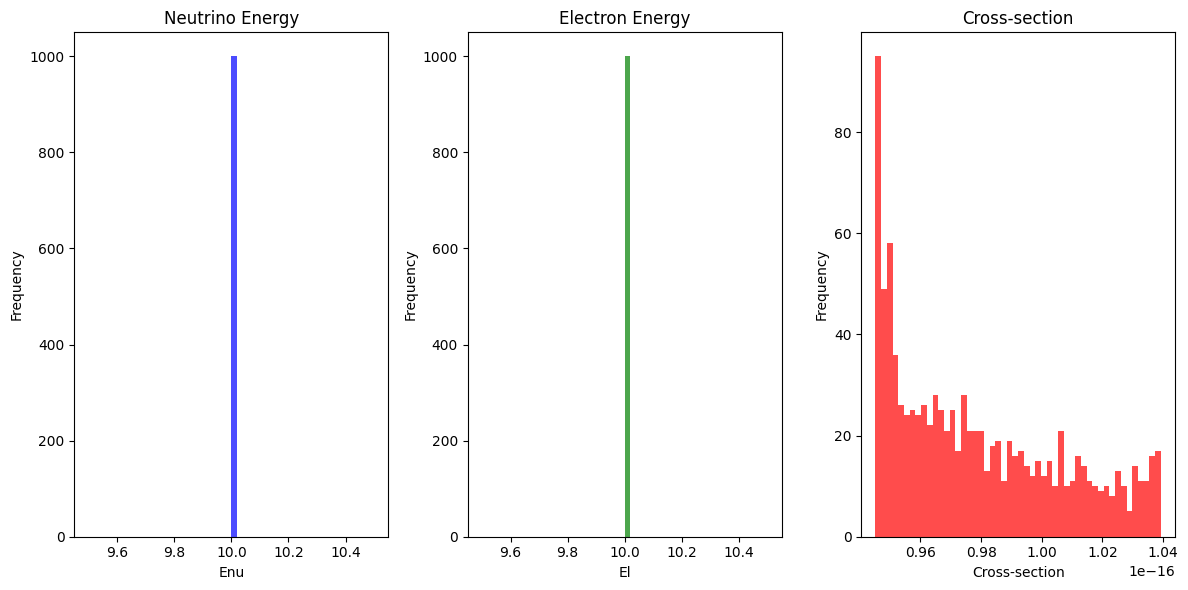

In [42]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

class NeutrinoElectronScattering:
    neutrinoelectron = 12
    neutrinomuon = 14
    neutrinotau = 16

    def __init__(self):
        self.sin2w = 0.23121
        self.gv = -1. / 2. + 2. * self.sin2w
        self.ga = -1. / 2.
        self.me = 0.510998950  # MeV
        self.mmu = 105.6583755  # MeV
        self.mtau = 1776.86  # MeV

        self.Pi = 3.1415927
        self.GF = 1.166378e-5  # GeV^-2
        self.GF2 = self.GF * self.GF
        self.MeV2mbarn = 1. / 2.56819e+6

        print("Neutrino-Electron scattering initialized")

    def electronmass(self):
        return self.me

    def muonmass(self):
        return self.mmu

    def taumass(self):
        return self.mtau

    def S(self, Enu):
        return (Enu + self.electronmass()) ** 2 - Enu ** 2

    def Y(self, Enu, Ee):
        return (Ee - self.electronmass()) / Enu

    def Normalization(self):
        return self.GF2 / self.Pi * self.MeV2mbarn

    def diffcrosssection(self, Enu, El, neutrino):
        aneut = False

        if neutrino < 0:
            aneut = True

        xs = 0

        if El >= self.electronmass():
            if abs(neutrino) == self.neutrinoelectron:
                xs = self.nuee(Enu, El, aneut)
            else:
                xs = self.nule(Enu, El, aneut)

        if xs < 0:
            xs = 0

        return xs

    def GENcrosssection(self, Enu, El, cos, neutrino):
        aneut = False

        if neutrino < 0:
            aneut = True

        xs = 0

        if El >= self.electronmass():
            if abs(neutrino) == self.neutrinoelectron:
                xs = self.GENnuee(Enu, El, cos, aneut)
            else:
                xs = self.GENnule(Enu, El, cos, aneut)

        if xs < 0:
            xs = 0

        return xs

    def Totalcrosssection(self, Enu, neutrino):
        aneut = False

        if neutrino < 0:
            aneut = True

        xs = 0

        if abs(neutrino) == self.neutrinoelectron:
            xs = self.nueeInt(Enu, aneut)
        else:
            xs = self.nuleInt(Enu, aneut)

        if xs < 0:
            xs = 0

        return xs

    def ComputeCosine(self, Enu, El, neutrino):
        mass = self.me

        Pl = math.sqrt(El ** 2 - mass ** 2)

        return (El * mass + Enu * El - mass ** 2 - Enu * mass) / (Enu * Pl)

    def ComputeEnu(self, Cosine, El, neutrino):
        mass = self.me

        Pl = math.sqrt(El ** 2 - mass ** 2)

        return (El * mass - mass ** 2) / (-El + mass + Pl * Cosine)

    def GenerateY(self, CLL, CLR, N):
        r = random.random()

        A = CLL ** 2 / N
        B = CLR ** 2 / N
        C = r

        a2 = 3. * A / B
        a3 = 3. * (C - B / 3. - A) / B

        Q = a2 / 3.
        R = -a3 / 2.

        discriminant = Q ** 3 + R ** 2

        S1 = (R + math.sqrt(discriminant)) ** (1. / 3.)
        S2 = -(math.sqrt(discriminant) - R) ** (1. / 3.)

        x1 = S1 + S2

        return 1 - x1

    def nule(self, Enu, Ee, aneut=False):
        y = self.Y(Enu, Ee)

        if not aneut:
            CLL = -1. / 2. + self.sin2w
            CLR = self.sin2w
        else:
            CLL = self.sin2w
            CLR = -1. / 2. + self.sin2w

        return self.Normalization() * self.S(Enu) * (CLL ** 2 + CLR ** 2 * (1 - y) ** 2)

    def nuleInt(self, Enu, aneut=False):
        norm = self.GF2 / self.Pi * self.MeV2mbarn
        s = self.S(Enu)

        CLL = -1. / 2. + self.sin2w
        CLR = self.sin2w

        if Enu == 0:
            ymax = 0
        else:
            ymax = (Enu - self.me) / Enu

        return norm * s * (CLL ** 2 * ymax + CLR ** 2 * 1. / 3. * (-(1 - ymax) ** 3 + 1))

    def GENnule(self, Enu, El, cos, aneut=False):
        norm = self.GF2 / self.Pi * self.MeV2mbarn
        s = self.S(Enu)

        CLL = -1. / 2. + self.sin2w
        CLR = self.sin2w

        if aneut:
            CLL = self.sin2w
            CLR = -1. / 2. + self.sin2w

        ymax = (Enu - self.me) / Enu

        N = self.nuleInt(Enu, aneut) / (norm * s)

        y1 = self.GenerateY(CLL, CLR, N)

        El = y1 * Enu + self.me

        cos = self.ComputeCosine(Enu, El, self.neutrinoelectron)

        return self.nule(Enu, El, aneut)

    def nueeInt(self, Enu, aneut=False):
        norm = self.GF2 / self.Pi * self.MeV2mbarn
        s = self.S(Enu)

        CLL = 1. / 2. + self.sin2w
        CLR = self.sin2w

        if Enu == 0:
            ymax = 0
        else:
            ymax = (Enu - self.me) / Enu

        return norm * s * (CLL ** 2 * ymax + CLR ** 2 * 1. / 3. * (-(1 - ymax) ** 3 + 1))

    def nuee(self, Enu, Ee, aneut=False):
        y = self.Y(Enu, Ee)

        if not aneut:
            CLL = 1. / 2. + self.sin2w
            CLR = self.sin2w
        else:
            CLL = -1. / 2. + self.sin2w
            CLR = 1. / 2. + self.sin2w

        return self.Normalization() * self.S(Enu) * (CLL ** 2 + CLR ** 2 * (1 - y) ** 2)

    def GENnuee(self, Enu, El, cos, aneut=False):
        CLL = 1. / 2. + self.sin2w
        CLR = self.sin2w

        ymax = (Enu - self.me) / Enu

        N = self.nueeInt(Enu, aneut) / self.Normalization() / self.S(Enu)

        y1 = self.GenerateY(CLL, CLR, N)

        El = y1 * Enu + self.me

        cos = self.ComputeCosine(Enu, El, self.neutrinoelectron)

        return self.nuee(Enu, El, aneut)


def generate_scattering_events(num_events):

    nul = NeutrinoElectronScattering()

    Enu_data = []
    El_data = []
    xs_data = []

    for _ in range(num_events):
        EnuIn = 10.0
        Emin = 0.0

        r = random.Random()
        if EnuIn < 0:
            Enu = r.uniform(Emin, -EnuIn)
        else:
            Enu = EnuIn


        cos = nul.ComputeCosine(Enu, Enu, nul.neutrinoelectron)
        El = nul.ComputeEnu(cos, Enu, nul.neutrinoelectron)
        xs = nul.GENcrosssection(Enu, El, cos, nul.neutrinoelectron)

        Enu_data.append(Enu)
        El_data.append(El)
        xs_data.append(xs)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.hist(Enu_data, bins=50, color='blue', alpha=0.7)
    plt.xlabel('Enu')
    plt.ylabel('Frequency')
    plt.title('Neutrino Energy')

    plt.subplot(1, 3, 2)
    plt.hist(El_data, bins=50, color='green', alpha=0.7)
    plt.xlabel('El')
    plt.ylabel('Frequency')
    plt.title('Electron Energy')

    plt.subplot(1, 3, 3)
    plt.hist(xs_data, bins=50, color='red', alpha=0.7)
    plt.xlabel('Cross-section')
    plt.ylabel('Frequency')
    plt.title('Cross-section')

    plt.tight_layout()
    plt.show()

generate_scattering_events(num_events=1000)
